In [1]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import pandas as pd
import requests
import os
import lxml.html as lh

Cargamos Todos los datos 

In [2]:
#VIH
url = 'https://www.indexmundi.com/map/?v=35&l=es'
html = requests.get(url).content
VIH = pd.read_html(html)[2]

In [3]:
#Birth_rate
url = 'https://www.indexmundi.com/map/?t=0&v=25&r=xx&l=en'
html = requests.get(url).content
Birth_rate = pd.read_html(html)[2]

In [4]:
path_ll_18 = '/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/Semana2/Tareas/dato_temperaturas_lluvia/201801010000Lluv.csv'
path_Mx_18 = '/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/Semana2/Tareas/dato_temperaturas_lluvia/201801010000TMax.csv'
path_Mm_18 = '/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/Semana2/Tareas/dato_temperaturas_lluvia/201801010000TMin.csv'
path_Md_18 = '/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/Semana2/Tareas/dato_temperaturas_lluvia/201801010000TMed.csv'
path_ll_19 = '/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/Semana2/Tareas/dato_temperaturas_lluvia/201905010000Lluv.csv'
path_Mx_19 = '/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/Semana2/Tareas/dato_temperaturas_lluvia/201901010000TMax.csv'
path_Mm_19 = '/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/Semana2/Tareas/dato_temperaturas_lluvia/201901010000TMin.csv'
path_Md_19 = '/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/Semana2/Tareas/dato_temperaturas_lluvia/201901010000TMed.csv'

In [5]:
lluvias_2018 = pd.read_csv(path_ll_18,encoding='latin-1')
Maxima_2018 = pd.read_csv(path_Mx_18,encoding='latin-1')
Minima_2018 = pd.read_csv(path_Mm_18,encoding='latin-1')
Media_2018 = pd.read_csv(path_Md_18,encoding='latin-1')
lluvias_2018 = lluvias_2018.rename(columns={'LON':'Lon','LAT':'Lat','ESTADO':'Edo','CLAVE_SIH':'Clave','NOMBRE':'Est','ENE':'Ene/18'}) 
lluvias_2019 = pd.read_csv(path_ll_19,encoding='latin-1')
Maxima_2019 = pd.read_csv(path_Mx_19,encoding='latin-1')
Minima_2019 = pd.read_csv(path_Mm_19,encoding='latin-1')
Media_2019 = pd.read_csv(path_Md_19,encoding='latin-1')
lluvias_2019 = lluvias_2019.rename(columns={'LON':'Lon','LAT':'Lat','EDO':'Edo','CLAVE_SIH':'Clave','NOMBRE':'Est','MAY':'May/19'})

In [6]:
#Combinamos las tablas en una sola base de datos:
T_2018 = pd.merge(pd.merge(Media_2018,Maxima_2018),Minima_2018)
T_2019 = pd.merge(pd.merge(Media_2019,Maxima_2019),Minima_2019)
Temperatura = pd.concat([T_2018, T_2019], keys=['2018', '2019'],sort=False)[['Lon', 'Lat', 'Edo', 'Clave', 'Est', 'Tmed','Tmax','Tmin']]

In [7]:
lluvias = pd.merge(lluvias_2018,lluvias_2019)

In [8]:
#Datos de mancahas solares
path_sp = '/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/Semana2/Tareas/sunspots.txt'

In [9]:
sunspots = np.loadtxt(path_sp,skiprows=4, unpack=True)

# Simple Line Plots

In [189]:
year, num= np.reshape(sunspots[::2],(1,300))[0],np.reshape(sunspots[1::2],(1,300))[0]

(0.0, 190.2)

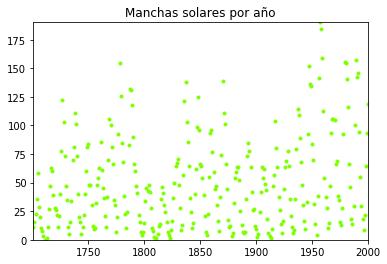

In [190]:
plt.plot(year,num,'.',color='chartreuse')
plt.title("Manchas solares por año")
plt.xlim(np.min(year),np.max(year))
plt.ylim(np.min(num),np.max(num))

In [191]:
x = np.arange(-1,1,0.1)
y = np.exp(-x**2)

Text(0.5,1,'Exponencial')

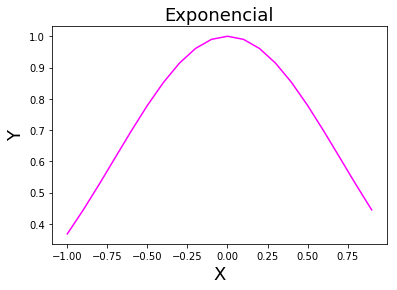

In [192]:
plt.figure()
plt.plot(x,y,color = 'magenta')
plt.xlabel('X',fontsize  =18)
plt.ylabel('Y',fontsize  =18)
plt.title('Exponencial',fontsize  =18)

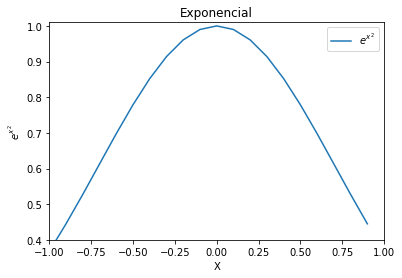

In [193]:
ax = plt.axes()
ax.plot(x,y,label='$e^{x^{2}}$')
ax.set(xlim=(-1,1), ylim=(0.4, 1.01),xlabel='X', ylabel='$e^{x^{2}}$',title='Exponencial')
plt.legend();

# Simple Scatter Plots

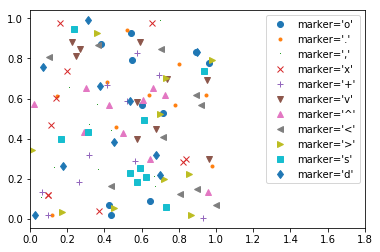

In [194]:
#Copio y pego para ver como funciona
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(10), rng.rand(10), marker,label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

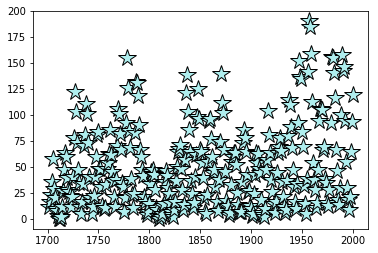

In [195]:
#Muestro los puntos de las manchas solares con más estilo:
plt.plot(year, num, '*',
         markersize=18, #tamaño de los puntos 
         markerfacecolor='paleturquoise', #color de relleno
         markeredgecolor='k', # color del contorno
         markeredgewidth=1); # Grosor del contorno 

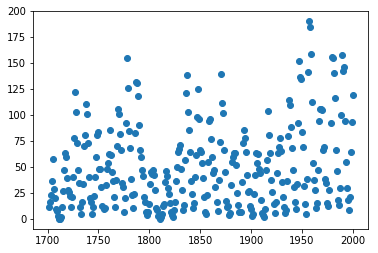

In [197]:
#Ahora lo hacemos con plt.scatter
plt.scatter(year,num);

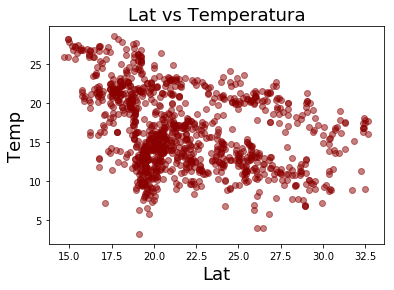

In [18]:
# Veoms Como varia la teperatura con la latitud
plt.scatter(np.array(Temperatura['Lat'][:'2018']),np.array(Temperatura['Tmed'][:'2018']),
            marker='o',
            color = 'darkred', 
            alpha = 0.5)
plt.title('Lat vs Temperatura',fontsize  =18)
plt.xlabel('Lat', fontsize = 18)
plt.ylabel('Temp',fontsize = 18);

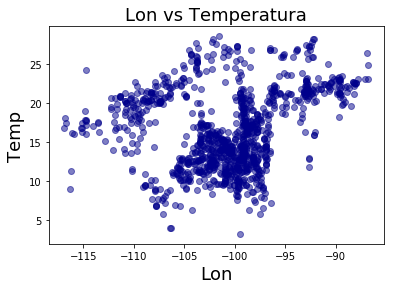

In [19]:
# Veoms Como varia la teperatura con la Longitud
plt.scatter(np.array(Temperatura['Lon'][:'2018']),np.array(Temperatura['Tmed'][:'2018']),
            marker='o',
            color = 'darkblue', 
            alpha = 0.5)
plt.title('Lon vs Temperatura',fontsize  =18)
plt.xlabel('Lon', fontsize = 18)
plt.ylabel('Temp',fontsize = 18);

# Visualizing Errors

In [20]:
 rnd = np.random.RandomState()

In [21]:
err_y = rnd.rand(len(y))*0.1 #producimos el error de Y en forma random

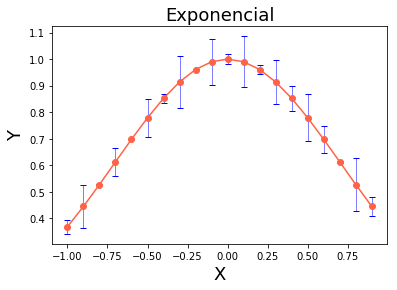

In [22]:
plt.errorbar(x, y, yerr=err_y, fmt='o-', color = 'tomato',
            ecolor = 'blue',
            elinewidth = 0.5,
            capsize = 3)
plt.xlabel('X',fontsize  =18)
plt.ylabel('Y',fontsize  =18)
plt.title('Exponencial',fontsize  =18);

# Density and Contour Plots

In [23]:
def f(x,y):
    return np.sin(np.abs(y)**x)*np.cos(np.abs(x)**y)

In [24]:
x_1 = np.linspace(-np.pi,np.pi,100)
y_1 = np.linspace(-3*np.pi/2, 3*np.pi/2,100)
X, Y = np.meshgrid(x_1, y_1)

In [25]:
Z = f(X,Y)

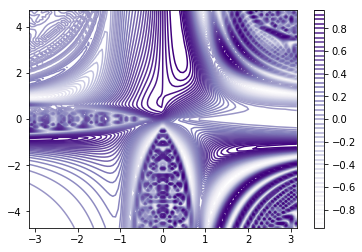

In [30]:
# Con Controur
plt.contour(X, Y, Z,
            50, #espesificar contas lineas se crearan
            cmap='Purples') #color de las lineas
plt.colorbar();

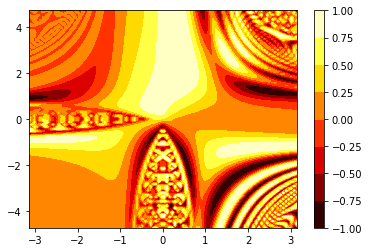

In [48]:
# Con Controurf
plt.contourf(X, Y, Z,
            cmap='hot') #color de las lineas
plt.colorbar();

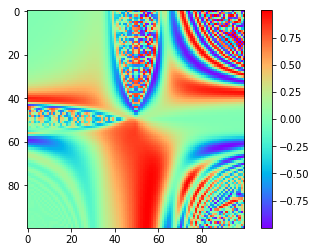

In [97]:
# Con imshow
plt.imshow(Z,origin='lower',cmap='rainbow')
plt.colorbar()
plt.axis(aspect='imagen');

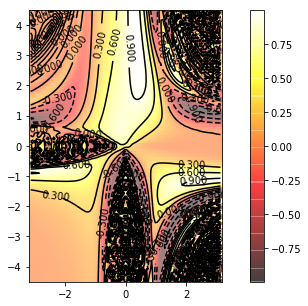

In [111]:
#Podemos convinar las tecnicas para graficar
plt.figure(figsize=(10,5))
graf = plt.contour(X, Y, Z, 6, colors = 'black') #Los limites que aparescan los ponemos como limites en imshow
plt.clabel(graf, inline=True, fontsize=10)
plt.imshow(Z,extent=[-3.2,3.2, -4.5, 4.5],
           origin='lower', #Ponemos lower de lo contrario la gráfica saldrá invertida
           cmap='hot', 
           alpha=0.5) # degradado
plt.colorbar();

# Histograms, Binnings, and Density

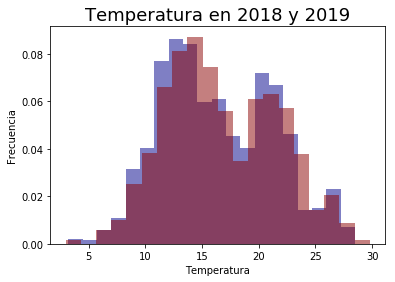

In [152]:
#Histograma de temperaturas medias de 2018
plt.hist(np.array(Temperatura['Tmed'][:'2018']),
         bins=20, #escojemos los bins (ancho de las barras)
         density = True, #Normalizamos
         alpha=0.5, #degradado
         color='darkblue')
#Histograma de temperaturas medias de 2019
plt.hist(np.array(Temperatura['Tmed'][:'2019']),
         bins=20, #escojemos los bins (ancho de las barras)
         density = True, #Normalizamos
         alpha=0.5, #degradado
         color='darkred')
plt.title('Temperatura en 2018 y 2019',fontsize =18)
plt.xlabel('Temperatura')
plt.ylabel('Frecuencia');

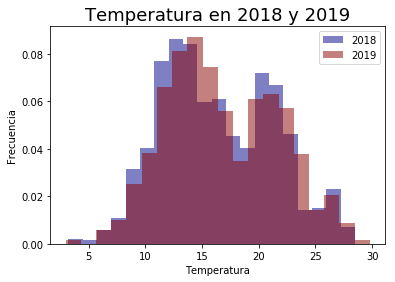

In [210]:
#podemos hacerlo mas conciso con dict y caracteristicas en comun
tun = dict(alpha=0.5, density=True, bins=20)

plt.hist(np.array(Temperatura['Tmed'][:'2018']),color='darkblue',**tun,label='2018')
plt.hist(np.array(Temperatura['Tmed'][:'2019']),color='darkred',**tun,label='2019')
plt.title('Temperatura en 2018 y 2019',fontsize  =18)
plt.xlabel('Temperatura')
plt.ylabel('Frecuencia')
plt.legend();

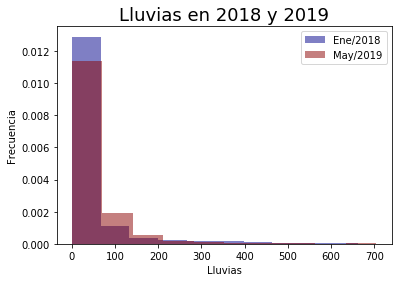

In [211]:
#podemos hacerlo mas conciso con dict y caracteristicas en comun
tun = dict(alpha=0.5, density=True, bins=10)

plt.hist(np.array(lluvias['Ene/18']),color='darkblue',**tun,label='Ene/2018')
plt.hist(np.array(lluvias['May/19']),color='darkred',**tun,label='May/2019')
plt.title('Lluvias en 2018 y 2019',fontsize  =18)
plt.xlabel('Lluvias')
plt.ylabel('Frecuencia')
plt.legend();

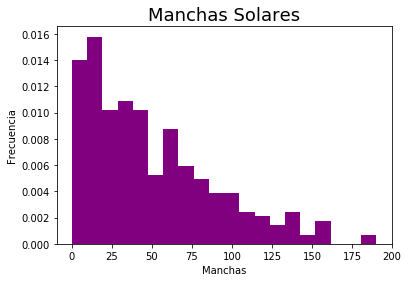

In [188]:
#Histograma de lluvias
plt.hist(num, density=True, bins=20, color='purple')
plt.title('Manchas Solares',fontsize  =18)
plt.xlabel('Manchas')
plt.ylabel('Frecuencia');

In [203]:
#Para solo obtener los dato del Histograma (Frecuecia por cada bin)
F,b = np.histogram(num,bins=20)
print(F) 
print(b) #separación de los bins

[40 45 29 31 29 15 25 17 14 11 11  7  6  4  7  2  5  0  0  2]
[  0.     9.51  19.02  28.53  38.04  47.55  57.06  66.57  76.08  85.59
  95.1  104.61 114.12 123.63 133.14 142.65 152.16 161.67 171.18 180.69
 190.2 ]


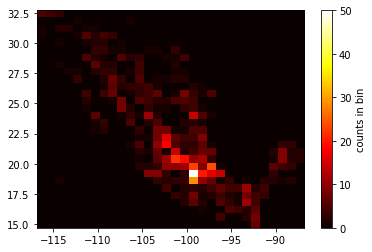

In [233]:
#Con un istograma Podemos ver los logares donde se hicieron mas mediciones en la temperatura
plt.hist2d(np.array(Temperatura['Lon'][:'2018']), np.array(Temperatura['Lat'][:'2018']), bins=30, cmap='hot')
cb = plt.colorbar()
cb.set_label('counts in bin');

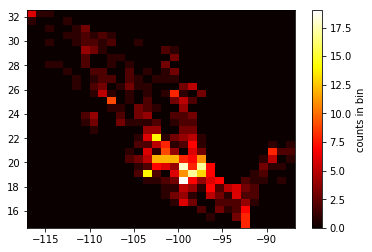

In [236]:
#Con un istograma Podemos ver los logares donde se hicieron mas mediciones en las lluvias
plt.hist2d(np.array(lluvias['Lon']), np.array(lluvias['Lat']), bins=30, cmap='hot')
cb = plt.colorbar()
cb.set_label('counts in bin');

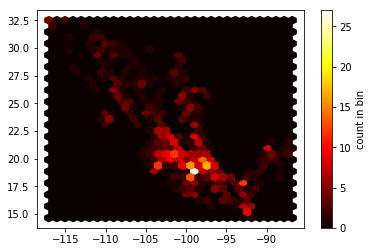

In [245]:
plt.hexbin(np.array(lluvias['Lon']), np.array(lluvias['Lat']), gridsize=30, cmap='hot')
plt.colorbar(label='count in bin');